In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **<font color = blue>DATA PROCESSING**

In [2]:
listings = pd.read_csv('listings.csv')
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6893 non-null   int64  
 1   listing_url                                   6893 non-null   object 
 2   scrape_id                                     6893 non-null   int64  
 3   last_scraped                                  6893 non-null   object 
 4   source                                        6893 non-null   object 
 5   name                                          6893 non-null   object 
 6   description                                   6877 non-null   object 
 7   neighborhood_overview                         4628 non-null   object 
 8   picture_url                                   6893 non-null   object 
 9   host_id                                       6893 non-null   i

In [4]:
listings.shape

(6893, 75)

In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.893000e+03,6.893000e+03,6.893000e+03,6893.000000,6893.000000,0.0,6893.000000,6893.000000,6893.000000,0.0,...,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6893.000000,6893.000000,6893.000000,6893.000000,6247.000000
mean,1.039312e+17,2.022091e+13,9.626814e+07,2.625997,4.692732,NaN,52.365961,4.892367,2.983461,NaN,...,4.757246,4.881910,4.888492,4.778999,4.652211,1.938924,1.021471,0.802843,0.037719,1.304610
std,2.377222e+17,2.031397e+00,1.277327e+08,12.140930,28.586961,NaN,0.022094,0.041864,1.483226,NaN,...,0.317500,0.215967,0.225735,0.254663,0.299561,2.738912,1.417637,2.267227,0.421800,2.332563
min,2.818000e+03,2.022091e+13,3.159000e+03,1.000000,1.000000,NaN,52.268010,4.742430,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.407934e+07,2.022091e+13,9.426449e+06,1.000000,1.000000,NaN,52.355030,4.866710,2.000000,NaN,...,4.660000,4.850000,4.870000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,3.110072e+07,2.022091e+13,3.338184e+07,1.000000,1.000000,NaN,52.365870,4.888670,2.000000,NaN,...,4.850000,4.950000,4.970000,4.840000,4.690000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,5.032563e+07,2.022091e+13,1.354875e+08,2.000000,3.000000,NaN,52.377040,4.911400,4.000000,NaN,...,5.000000,5.000000,5.000000,4.990000,4.830000,1.000000,1.000000,1.000000,0.000000,1.630000
max,7.099861e+17,2.022091e+13,4.783754e+08,446.000000,997.000000,NaN,52.442340,5.074204,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,14.000000,21.000000,8.000000,104.110000


# **Data Processing and Cleaning**

In [6]:
column_to_be_used = ['id',
                     'host_name',
                     'host_since',
                     'host_response_time',
                     'host_response_rate',
                     'property_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'price',
                     'number_of_reviews']

listings_filtered = listings[column_to_be_used]
listings_filtered.head(5)

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100%,Private room in rental unit,2,NaN,1.0,$49.00,305
1,20168,Alexander,2009-12-02,within an hour,100%,Private room in townhouse,2,NaN,1.0,$106.00,339
2,27886,Flip,2010-03-23,within an hour,100%,Private room in houseboat,2,NaN,1.0,$136.00,231
3,28871,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,2,NaN,1.0,$75.00,428
4,29051,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,1,NaN,1.0,$55.00,582


In [7]:
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6893 non-null   int64  
 1   host_name           6893 non-null   object 
 2   host_since          6893 non-null   object 
 3   host_response_time  5236 non-null   object 
 4   host_response_rate  5236 non-null   object 
 5   property_type       6893 non-null   object 
 6   accommodates        6893 non-null   int64  
 7   bathrooms           0 non-null      float64
 8   bedrooms            6578 non-null   float64
 9   price               6893 non-null   object 
 10  number_of_reviews   6893 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 592.5+ KB


In [8]:
listings_filtered.host_since.head()

,host_since
0,2008-09-24
1,2009-12-02
2,2010-03-23
3,2010-05-13
4,2010-05-13


In [9]:
listings_filtered.host_since =  pd.to_datetime(listings_filtered.host_since, yearfirst = True)
listings_filtered.host_since

<ipython-input-9-d2aabe75319e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_since =  pd.to_datetime(listings_filtered.host_since, yearfirst = True)


,host_since
0,2008-09-24
1,2009-12-02
2,2010-03-23
3,2010-05-13
4,2010-05-13
...,...
6888,2014-05-03
6889,2015-10-13
6890,2016-09-22
6891,2016-01-18


In [10]:
listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace('%','')
listings_filtered.host_response_rate

<ipython-input-10-a18fb8b483ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace('%','')


,host_response_rate
0,100
1,100
2,100
3,100
4,100
...,...
6888,100
6889,67
6890,100
6891,0


In [11]:
listings_filtered.host_response_rate.fillna(-1, inplace=True)
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)
listings_filtered.host_response_rate.replace(-1, np.nan, inplace=True)
listings_filtered.host_response_rate

<ipython-input-11-a8b50d02eb6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate.fillna(-1, inplace=True)
<ipython-input-11-a8b50d02eb6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)
<ipython-input-11-a8b50d02eb6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,host_response_rate
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
6888,100.0
6889,67.0
6890,100.0
6891,0.0


In [12]:
listings_filtered = listings_filtered.rename(columns = {'host_response_rate':'percent_host_response_rate'})
listings_filtered.percent_host_response_rate

,percent_host_response_rate
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
6888,100.0
6889,67.0
6890,100.0
6891,0.0


In [13]:
listings_filtered.price.unique()

array(['$49.00', '$106.00', '$136.00', '$75.00', '$55.00', '$240.00',
       '$245.00', '$124.00', '$250.00', '$149.00', '$120.00', '$82.00',
       '$119.00', '$165.00', '$65.00', '$115.00', '$265.00', '$200.00',
       '$175.00', '$88.00', '$195.00', '$305.00', '$118.00', '$300.00',
       '$551.00', '$122.00', '$350.00', '$296.00', '$318.00', '$1,236.00',
       '$130.00', '$171.00', '$161.00', '$105.00', '$151.00', '$911.00',
       '$125.00', '$95.00', '$225.00', '$239.00', '$220.00', '$99.00',
       '$395.00', '$255.00', '$199.00', '$178.00', '$399.00', '$139.00',
       '$110.00', '$152.00', '$126.00', '$129.00', '$150.00', '$80.00',
       '$275.00', '$176.00', '$100.00', '$160.00', '$475.00', '$154.00',
       '$600.00', '$159.00', '$440.00', '$180.00', '$140.00', '$108.00',
       '$163.00', '$170.00', '$360.00', '$380.00', '$177.00', '$87.00',
       '$450.00', '$128.00', '$109.00', '$113.00', '$189.00', '$146.00',
       '$571.00', '$81.00', '$73.00', '$188.00', '$112.00',

From the information above:

*   Each price data begins with a $ symbol
*   For prices that reach thousands, the unit uses a comma sign

In [14]:
listings_filtered.price = listings_filtered.price.str.replace('$','')
listings_filtered.price = listings_filtered.price.str.replace(',','')

listings_filtered.price = listings_filtered.price.astype('float')

listings_filtered.price

,price
0,49.0
1,106.0
2,136.0
3,75.0
4,55.0
...,...
6888,300.0
6889,195.0
6890,449.0
6891,282.0


# **Handling Missing Values**

In [15]:
col_nan = listings_filtered.isna().sum().sort_values(ascending=False)
col_nan

,0
bathrooms,6893
host_response_time,1657
percent_host_response_rate,1657
bedrooms,315
host_since,0
id,0
host_name,0
accommodates,0
property_type,0
price,0


In [16]:
percent_col_nan = (col_nan/len(listings_filtered))*100
percent_col_nan

,0
bathrooms,100.000000
host_response_time,24.038880
percent_host_response_rate,24.038880
bedrooms,4.569853
host_since,0.000000
id,0.000000
host_name,0.000000
accommodates,0.000000
property_type,0.000000
price,0.000000


In [17]:
listings_filtered = listings_filtered.drop(columns='bathrooms')
listings_filtered

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100.0,Private room in rental unit,2,1.0,49.0,305
1,20168,Alexander,2009-12-02,within an hour,100.0,Private room in townhouse,2,1.0,106.0,339
2,27886,Flip,2010-03-23,within an hour,100.0,Private room in houseboat,2,1.0,136.0,231
3,28871,Edwin,2010-05-13,within an hour,100.0,Private room in rental unit,2,1.0,75.0,428
4,29051,Edwin,2010-05-13,within an hour,100.0,Private room in rental unit,1,1.0,55.0,582
...,...,...,...,...,...,...,...,...,...,...
6888,12690380,Lennard,2014-05-03,within a few hours,100.0,Entire townhouse,8,4.0,300.0,28
6889,15005354,Gea,2015-10-13,within an hour,67.0,Entire home,6,4.0,195.0,18
6890,15171981,Ischa,2016-09-22,within an hour,100.0,Entire home,6,4.0,449.0,21
6891,17567812,Manon,2016-01-18,a few days or more,0.0,Entire home,6,5.0,282.0,8


Because host_response_time and bedrooms are categorical and discrete numeric types, will input nan with its mode value.
In the percent_host_response_rate column will input with the mean or median value

In [18]:
listings_filtered['host_response_time'].value_counts()

,count
host_response_time,
within an hour,2942
within a few hours,1251
within a day,939
a few days or more,104


In [19]:
listings_filtered['bedrooms'].value_counts()

,count
bedrooms,
1.0,4004
2.0,1598
3.0,676
4.0,238
5.0,46
6.0,6
10.0,4
8.0,4
7.0,1


In [20]:
modus_host_response_time = listings_filtered.host_response_time.mode()[0]

In [21]:
listings_filtered.host_response_time.fillna(modus_host_response_time,inplace=True)

In [22]:
modus_bedrooms = listings_filtered.bedrooms.mode()[0]

In [23]:
listings_filtered.bedrooms.fillna(modus_bedrooms, inplace=True)

<Axes: xlabel='percent_host_response_rate', ylabel='Count'>

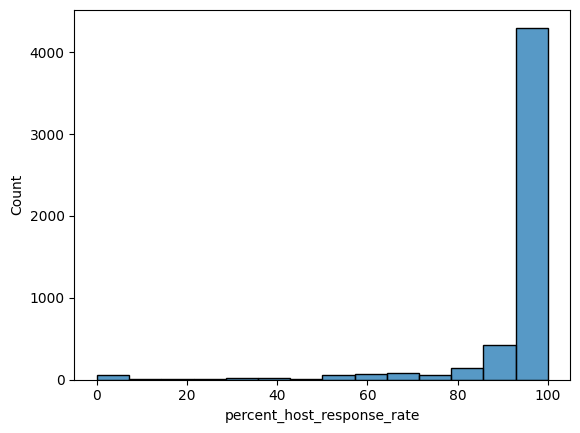

In [24]:
sns.histplot(data=listings_filtered,
             x='percent_host_response_rate')

Because the distribution is not normal, the median will be used to input missing values in the percent_host_response_rate column

In [25]:
median_percent_host_response_rate = listings_filtered.percent_host_response_rate.median()
listings_filtered.percent_host_response_rate.fillna(median_percent_host_response_rate, inplace=True)

In [26]:
listings_filtered.isna().sum()

,0
id,0
host_name,0
host_since,0
host_response_time,0
percent_host_response_rate,0
property_type,0
accommodates,0
bedrooms,0
price,0
number_of_reviews,0


# **Handling Duplicate Values**

In [27]:
listings_filtered.duplicated().sum()

np.int64(0)

# **Handling Inconsistent Values**

In [28]:
listings_filtered.property_type.unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in home', 'Entire guesthouse',
       'Private room in boat', 'Entire townhouse',
       'Room in boutique hotel', 'Entire condo', 'Private room in loft',
       'Private room in guest suite', 'Entire home', 'Boat',
       'Private room in farm stay', 'Houseboat',
       'Room in bed and breakfast', 'Private room in condo',
       'Entire chalet', 'Private room in guesthouse',
       'Shared room in rental unit', 'Shared room in home',
       'Private room in island', 'Entire villa', 'Private room in villa',
       'Private room in tiny home', 'Private room in casa particular',
       'Entire serviced apartment', 'Barn', 'Private room in bungalow',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Private room in serviced apartment', 'Room in aparth

In [29]:
listings_filtered.property_type.nunique()

62

From the data above:

- The number of property categories is quite large at 62.
- Some property types have the same words, such as private room, shared room etc.

ill reduce the number of categories by doing this:

- If the category contains the word Private room, it will be made into a private room category.
- If the category contains the word Shared room, it will be categorized as a shared room.
- If the category contains the word Entire, it will become the Entire Home/apt category.
- Other than that, it will be changed to others

In [30]:
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'private room' if 'Private room' in x else x)

listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'shared room' if 'Shared room' in x else x)

listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'entire home/apt' if 'Entire' in x else x)

listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'others' if ('entire' not in x
                                                                                               and 'private' not in x
                                                                                              and 'shared' not in x) else x)

In [31]:
listings_filtered.property_type.unique()

array(['private room', 'entire home/apt', 'others', 'shared room'],
      dtype=object)

# **Handling Outliers**

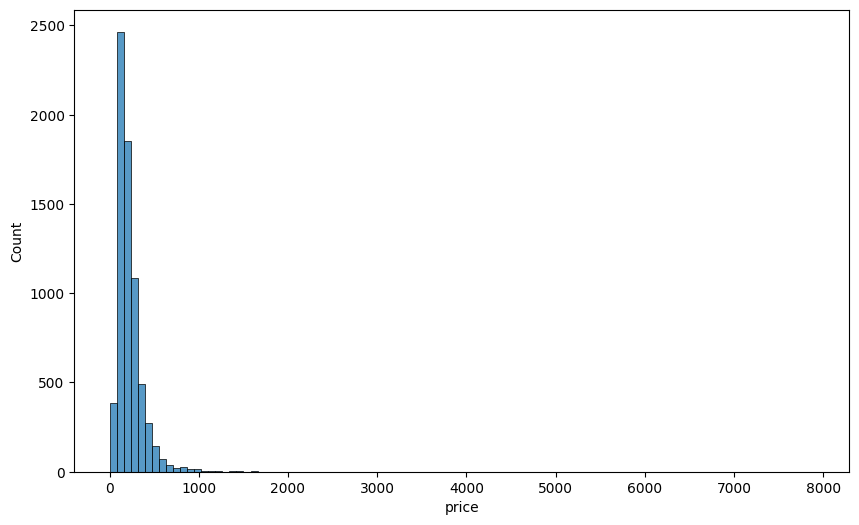

In [32]:
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = listings_filtered,
             x = 'price',
             bins = 100,
             ax = ax)
plt.show()

In [33]:
listings_filtered.price.describe()

,price
count,6893.000000
mean,218.487306
std,192.576328
min,0.000000
25%,125.000000
50%,180.000000
75%,264.000000
max,7900.000000


In [34]:
Q1 = listings_filtered.price.quantile(0.25)
Q3 = listings_filtered.price.quantile(0.75)

print(f'Q1 : {Q1:.2f}')
print(f'Q3 : {Q3:.2f}')

Q1 : 125.00
Q3 : 264.00


In [35]:
IQR = Q3-Q1

print(f'IQR : {IQR:.2f}')

IQR : 139.00


In [36]:
max_bound = Q3 + 1.5*IQR

print(f'Maximum boundary : {max_bound:.2f}')

Maximum boundary : 472.50


In [37]:
listings_filtered = listings_filtered[listings_filtered['price']<max_bound]

In [38]:
listings_filtered.price.describe()

,price
count,6543.000000
mean,192.239034
std,92.366092
min,0.000000
25%,120.000000
50%,175.000000
75%,250.000000
max,471.000000


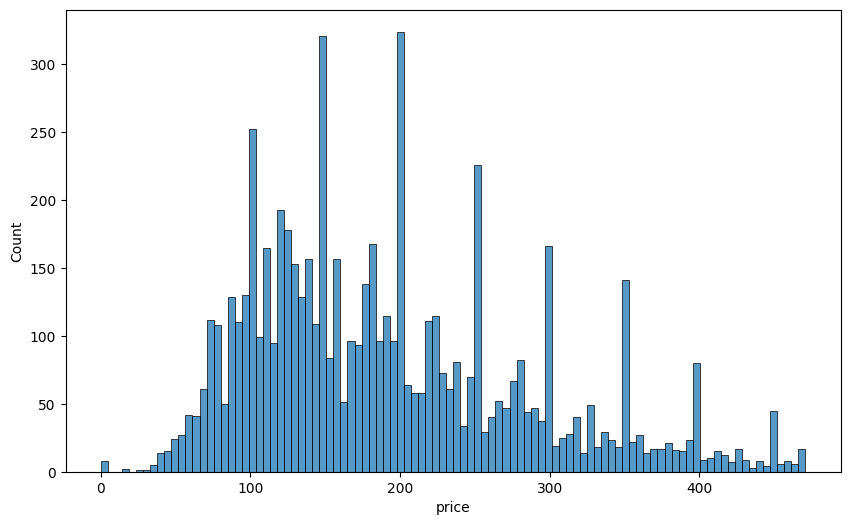

In [39]:
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = listings_filtered,
             x = 'price',
             bins = 100,
             ax = ax)
plt.show()

# **<font color = blue>DATA ANALYSIS**

# **1. Sum of Hosts Registered per Year**

In [40]:
listings_filtered['year'] = listings_filtered.host_since.dt.year
listings_filtered

<ipython-input-40-d305a4e6e91f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered['year'] = listings_filtered.host_since.dt.year


,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews,year
0,2818,Daniel,2008-09-24,within an hour,100.0,private room,2,1.0,49.0,305,2008
1,20168,Alexander,2009-12-02,within an hour,100.0,private room,2,1.0,106.0,339,2009
2,27886,Flip,2010-03-23,within an hour,100.0,private room,2,1.0,136.0,231,2010
3,28871,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,75.0,428,2010
4,29051,Edwin,2010-05-13,within an hour,100.0,private room,1,1.0,55.0,582,2010
...,...,...,...,...,...,...,...,...,...,...,...
6888,12690380,Lennard,2014-05-03,within a few hours,100.0,entire home/apt,8,4.0,300.0,28,2014
6889,15005354,Gea,2015-10-13,within an hour,67.0,entire home/apt,6,4.0,195.0,18,2015
6890,15171981,Ischa,2016-09-22,within an hour,100.0,entire home/apt,6,4.0,449.0,21,2016
6891,17567812,Manon,2016-01-18,a few days or more,0.0,entire home/apt,6,5.0,282.0,8,2016


In [41]:
registered_host_per_year = listings_filtered.groupby('year').count()[['id']]
registered_host_per_year

,id
year,
2008,2
2009,3
2010,42
2011,184
2012,617
2013,996
2014,1093
2015,966
2016,847


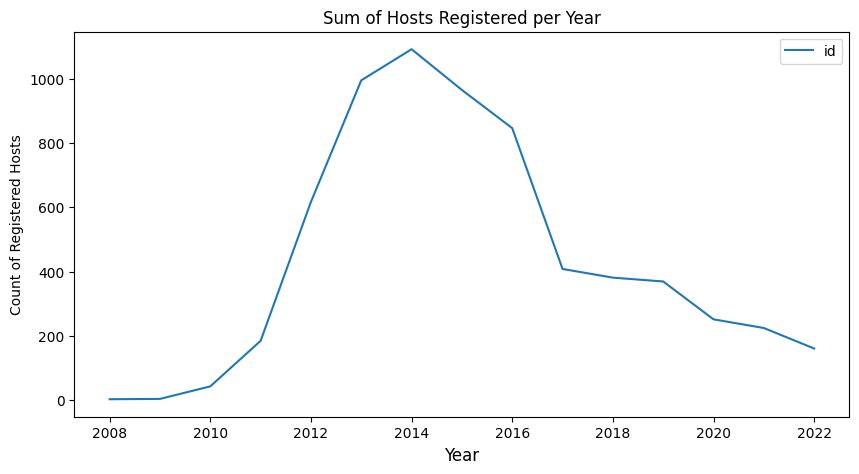

In [42]:
fig, ax = plt.subplots(figsize = (10,5))

sns.lineplot(data = registered_host_per_year, ax = ax)

ax.set_title('Sum of Hosts Registered per Year')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count of Registered Hosts')

plt.show()

**Conslusions :**

* Since 2010, many hosts started registering their properties on Airbnb, reaching a peak in 2014 with 1,142 new hosts.
* After 2014, the number of new registered hosts gradually declined until 2022.



# **2. Count of hosts with a response rate over 70% by property type**

In [43]:
response_rate_over70 = listings_filtered[listings_filtered['percent_host_response_rate']>70]
response_rate_over70

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews,year
0,2818,Daniel,2008-09-24,within an hour,100.0,private room,2,1.0,49.0,305,2008
1,20168,Alexander,2009-12-02,within an hour,100.0,private room,2,1.0,106.0,339,2009
2,27886,Flip,2010-03-23,within an hour,100.0,private room,2,1.0,136.0,231,2010
3,28871,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,75.0,428,2010
4,29051,Edwin,2010-05-13,within an hour,100.0,private room,1,1.0,55.0,582,2010
...,...,...,...,...,...,...,...,...,...,...,...
6886,13612056,Allard,2016-06-20,within an hour,100.0,entire home/apt,4,3.0,180.0,33,2016
6887,16820254,Fleur,2017-01-17,within a day,86.0,entire home/apt,4,3.0,140.0,13,2017
6888,12690380,Lennard,2014-05-03,within a few hours,100.0,entire home/apt,8,4.0,300.0,28,2014
6890,15171981,Ischa,2016-09-22,within an hour,100.0,entire home/apt,6,4.0,449.0,21,2016


In [44]:
n_response_abv_70_by_property_type = response_rate_over70.groupby('property_type').count()[['id']].reset_index()
n_response_abv_70_by_property_type

,property_type,id
0,entire home/apt,4177
1,others,492
2,private room,1566
3,shared room,35


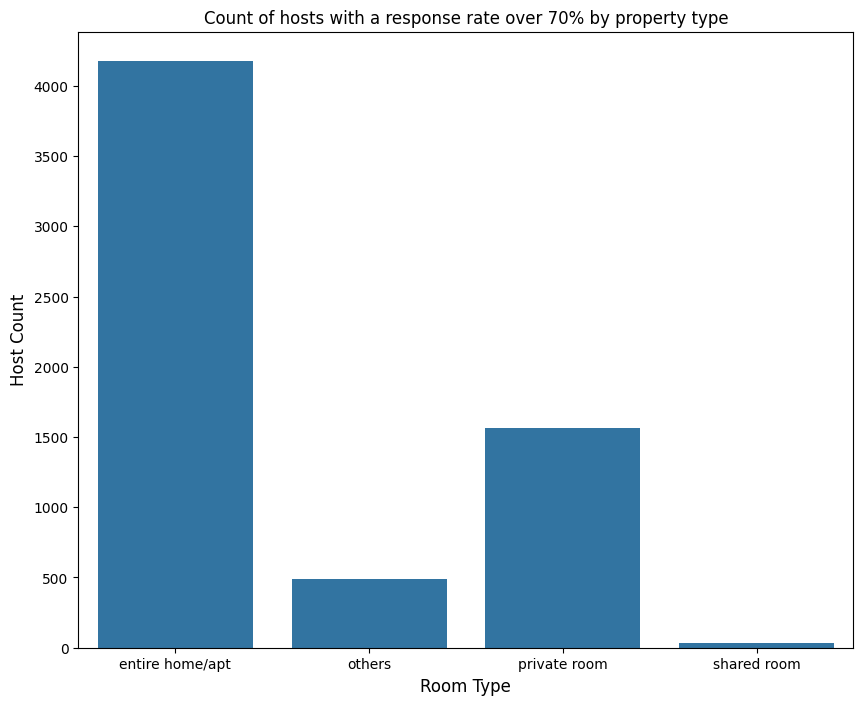

In [45]:
fig, ax = plt.subplots(figsize = (10,8))

sns.barplot(data = n_response_abv_70_by_property_type,
            x = 'property_type',
            y = 'id',
            ax = ax)

ax.set_title('Count of hosts with a response rate over 70% by property type')
ax.set_xlabel('Room Type', fontsize = 12)
ax.set_ylabel('Host Count', fontsize = 12)

plt.show()

**Conclusions :**

* Hosts with the 'Entire home/apt' property category have the highest response rate compared to others
* Only a few hosts with the 'Shared room' property category have a response rate above 70%

# **3. Response time host distribution**

In [46]:
n_response_time = listings_filtered.groupby("host_response_time").count()[["id"]].reset_index()
n_response_time

,host_response_time,id
0,a few days or more,97
1,within a day,883
2,within a few hours,1161
3,within an hour,4402


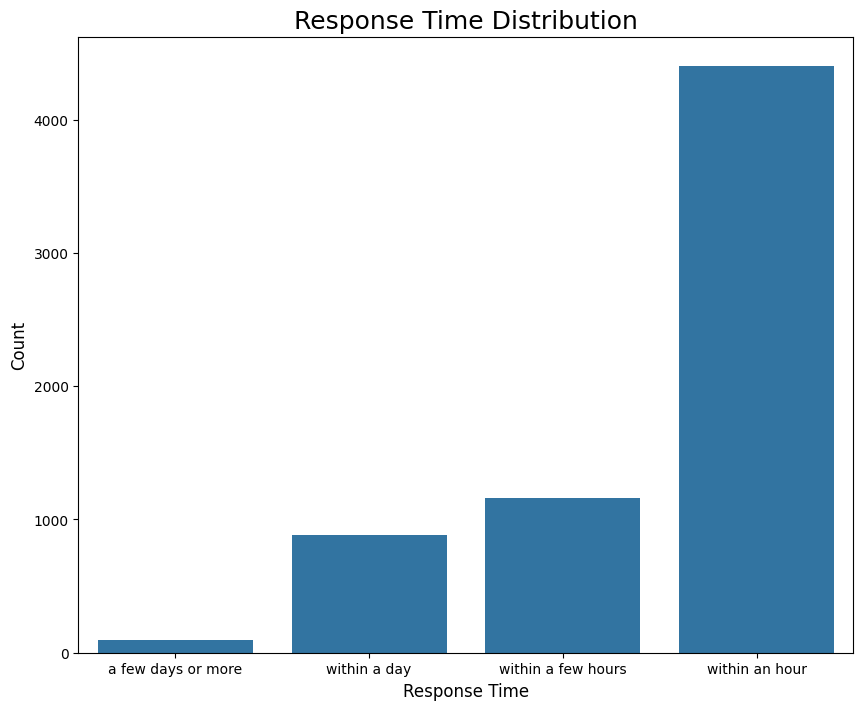

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=n_response_time, x="host_response_time", y="id", ax=ax)

ax.set_title("Response Time Distribution", fontsize=18)

ax.set_xlabel("Response Time", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

**Conclusion :**

The majority of hosts respond within one hour.

# **4. Average number of reviews for each property type**

In [48]:
mean_review_by_room_type = listings_filtered.groupby('property_type')[['number_of_reviews']].mean().reset_index()
mean_review_by_room_type

,property_type,number_of_reviews
0,entire home/apt,25.234919
1,others,63.816956
2,private room,117.635110
3,shared room,91.222222


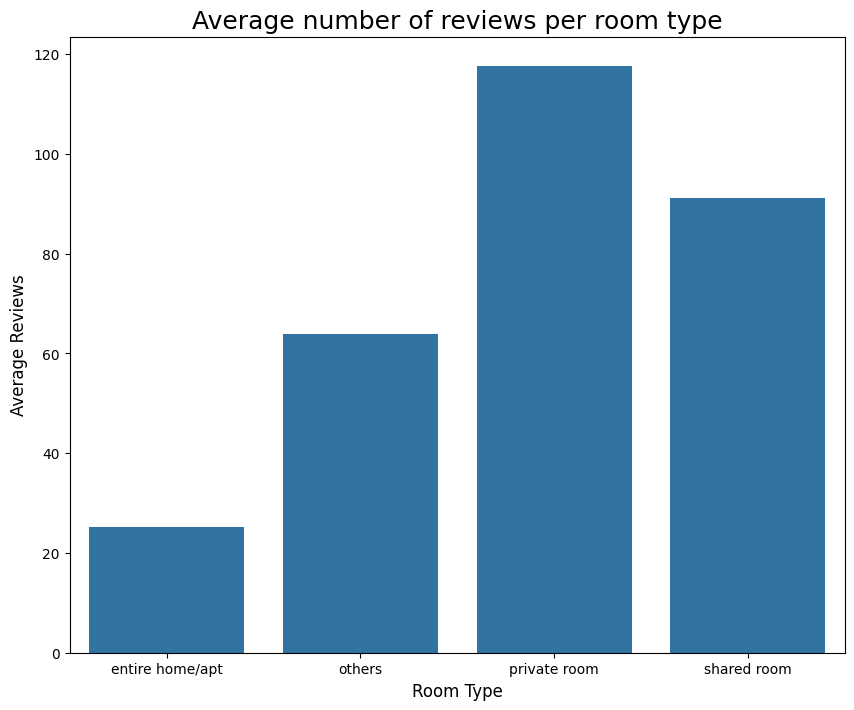

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=mean_review_by_room_type, x="property_type", y="number_of_reviews", ax=ax)

ax.set_title("Average number of reviews per room type", fontsize=18)

ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Average Reviews", fontsize=12)

plt.show()